In [1]:
import pandas as pd
import altair as alt

In [2]:
totalCount = pd.read_csv("https://raw.githubusercontent.com/ZhenZhouXu/Data-analysis-project/main/data_sources/ArrestData%202020/2020ArrestData%20output/totalCounts.out/part-00000"
            , header=None, names=['Date', 'Counts'])
boroughCount = pd.read_csv("https://raw.githubusercontent.com/ZhenZhouXu/Data-analysis-project/main/data_sources/ArrestData%202020/2020ArrestData%20output/boroughCounts.out/part-00000"
            , header=None, names=['Date', 'Borough','Counts'])

In [3]:
totalCount

,Date,Counts
0,01/01/2020,491
1,01/02/2020,640
2,01/03/2020,472
3,01/04/2020,375
4,01/05/2020,353
...,...,...
269,09/26/2020,398
270,09/27/2020,305
271,09/28/2020,311
272,09/29/2020,347


In [79]:
totalCount

,Date,Counts
0,01/01/2020,491
1,01/02/2020,640
2,01/03/2020,472
3,01/04/2020,375
4,01/05/2020,353
...,...,...
269,09/26/2020,398
270,09/27/2020,305
271,09/28/2020,311
272,09/29/2020,347


In [4]:
boroughCount

,Date,Borough,Counts
0,01/01/2020,B,115
1,01/01/2020,K,155
2,01/01/2020,M,96
3,01/01/2020,Q,107
4,01/01/2020,S,18
...,...,...,...
1363,09/30/2020,B,129
1364,09/30/2020,K,116
1365,09/30/2020,M,92
1366,09/30/2020,Q,77


In [5]:
#Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
eachCount = boroughCount.loc[boroughCount["Borough"] == "B"].reset_index()
siCount = boroughCount.loc[boroughCount["Borough"] == "S"].reset_index()
bronxCount = boroughCount.loc[boroughCount["Borough"] == "K"].reset_index()
mCount = boroughCount.loc[boroughCount["Borough"] == "M"].reset_index()
qCount = boroughCount.loc[boroughCount["Borough"] == "Q"].reset_index()
eachCount["siCount"]=siCount["Counts"]
eachCount["bronxCount"]=bronxCount["Counts"]
eachCount["mCount"]=mCount["Counts"]
eachCount["qCount"]=qCount["Counts"]
del eachCount["index"]
del eachCount["Borough"]

In [6]:
eachCount.columns = ["Date","Brooklyn","Staten Island","Bronx","Manhattan","Queens"]

In [235]:
eachCount

,Date,Brooklyn,Staten Island,Bronx,Manhattan,Queens
0,01/01/2020,115,18.0,155,96,107
1,01/02/2020,115,19.0,207,172,127
2,01/03/2020,100,27.0,157,94,94
3,01/04/2020,104,9.0,99,111,52
4,01/05/2020,72,15.0,97,93,76
...,...,...,...,...,...,...
269,09/26/2020,72,14.0,143,104,66
270,09/27/2020,61,17.0,91,59,79
271,09/28/2020,63,10.0,93,85,56
272,09/29/2020,75,NaN,88,83,84


In [7]:
base = alt.Chart(eachCount).encode(
    x='Date:T'
)
line =  base.mark_line().transform_fold(
    fold=["Brooklyn","Staten Island","Bronx","Manhattan","Queens"],
    as_=['Borough', 'Counts']
).mark_line().encode(
    x='Date:T',
    y='Counts:Q',
    color = "Borough:N",
    strokeDash='Borough:N',
).encode(
    y = "Counts:Q"
)

line.properties(
    width=800,
    height=300
).configure_legend(
    labelFontSize=15,
    titleFontSize=15,
).interactive()

alt.Chart(...)

In [8]:
alt.Chart(eachCount).mark_bar().transform_fold(
    fold=["Brooklyn","Staten Island","Bronx","Manhattan","Queens"],
    as_=['Borough', 'Counts']
).encode(
    x='Date:T',
    y='Counts:Q',
    color='Borough:N'
).properties(
    width=800,
    height=300
).configure_legend(
    labelFontSize=15,
    titleFontSize=15,
).interactive()

alt.Chart(...)

In [9]:
#Crime cases and date 
from altair import datum

base = alt.Chart(totalCount).encode(
    x='Date:T'
)
bar = base.mark_bar().encode(y='Counts:Q')
line =  base.mark_line(color = "red").transform_window(
    Counts='mean(Counts)',
    frame=[-25, 25]
).encode(
    alt.X("Date:T"),
    alt.Y("Counts:Q")
)
(bar+line).properties(
    width=800,
    height=300
).configure_legend(
    labelFontSize=24,
    titleFontSize=24,
).interactive()

alt.LayerChart(...)

In [475]:
crimeCategory = pd.read_csv("https://raw.githubusercontent.com/ZhenZhouXu/Data-analysis-project/main/data_sources/ArrestData%202020/2020ArrestData%20output/totalCategoryCounts.out/part-00000"
            , header=None, names=['Date',"Category",'Counts'])

In [476]:
crimeCategory["Counts"].sum()

79490

In [477]:
#assult - assult12(a12), assult3(a3)Larceny - petit(l1) and grand(l2) and motor vehicle(l3)
#DANGEROUS DRUGS(dd)DANGEROUS WEAPONS(dw)ROBBERY(r)
#Sex crimes - SEX CRIMES(sc1) AND RAPE(sc2) Burglary(bg) Criminal mischief - damage other people’s property(cm)
#CRIMINAL TRESPASS(ct) Vehicle and traffic laws(vt)
hashMap = ["a12","a3","l1","l2","l3","dd","dw","r","bg","cm","ct","vt","m","sc1","sc2"]
array = []
eachCategory = []
for idx,ctg in enumerate(hashMap):
    array.append(crimeCategory.loc[crimeCategory["Category"] == ctg])
    eachCategory.append(crimeCategory.loc[crimeCategory["Category"] == ctg])

In [478]:
for idx,ctg in enumerate(hashMap):
    array[idx]['Date'] = pd.to_datetime(array[idx]['Date'], format="%m/%d/%Y")
    array[idx] = array[idx].set_index('Date')
    array[idx] = array[idx].resample("M").sum()


<ipython-input-478-90b8c14e3233>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array[idx]['Date'] = pd.to_datetime(array[idx]['Date'], format="%m/%d/%Y")


In [479]:
#merge a12 and a3
array[0]["Counts"] = array[0]["Counts"] + array[1]["Counts"]
#merge l1 and l2
array[2]["Counts"] = array[2]["Counts"] + array[3]["Counts"]
#merge sc1 and sc2
array[13]["Counts"] = array[13]["Counts"] + array[14]["Counts"]
array = [array[0],array[2],array[4],array[5],array[7],array[8],array[11],array[13]]


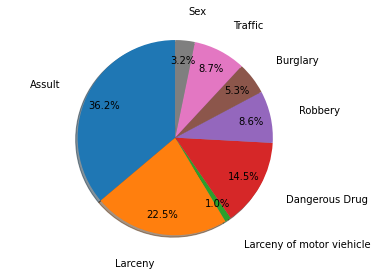

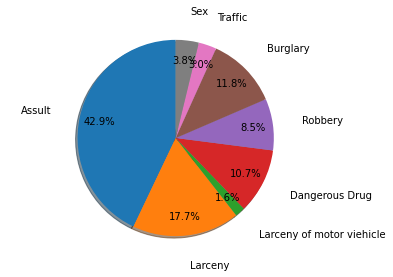

In [480]:
import matplotlib.pyplot as plt
#"a12","a3","l1","l2","l3","dd","dw","r","bg","cm","ct","vt","m","sc1","sc2"
labels = ['Assult', 'Larceny', 'Larceny of motor viehicle', 'Dangerous Drug','Robbery','Burglary','Traffic',"Sex"]
before = []
after = []
for j in range(len(array)):
    before.append(array[j]['Counts'][0:3].sum())
for j in range(len(array)):
    after.append(array[j]['Counts'][3:6].sum())
explode = (0, 0, 0, 0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
#patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
ax1.pie(before, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,pctdistance=0.8, labeldistance=1.3)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
explode = (0, 0, 0, 0,0,0,0,0)
ax2.pie(after, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,pctdistance=0.8, labeldistance=1.3)
ax2.axis('equal')
plt.show()

In [485]:
chart = alt.Chart(eachCategory[-4],title = "Traffic Violation").mark_line().transform_window(
    Counts='mean(Counts)',
    frame=[-30,30]
).encode(
    x = "Date:T",
    y='Counts:Q',
).properties(
    width=300,
    height=300
)
chart2 = alt.Chart(eachCategory[8],title = "Burglary").mark_line().transform_window(
    Counts='mean(Counts)',
    frame=[-30,30]
).encode(
    x = "Date:T",
    y='Counts:Q',
).properties(
    width=300,
    height=300
)
#eachCategory[-4]
alt.hconcat(chart,chart2)

alt.HConcatChart(...)

In [471]:
ageCount = pd.read_csv("https://raw.githubusercontent.com/ZhenZhouXu/Data-analysis-project/main/data_sources/ArrestData%202020/2020ArrestData%20output/totalAgeCounts.out/part-00000"
            , header=None, names=['Date', 'ageGroup','Counts'])

In [472]:
ageCount

,Date,ageGroup,Counts
0,01/01/2020,18-24,70
1,01/01/2020,25-44,212
2,01/01/2020,45-64,66
3,01/01/2020,65+,3
4,01/01/2020,<18,9
...,...,...,...
1340,09/29/2020,<18,15
1341,09/30/2020,18-24,44
1342,09/30/2020,25-44,187
1343,09/30/2020,45-64,60


In [492]:
eighteen = ageCount.loc[ageCount["ageGroup"] == "<18"]
twoFour = ageCount.loc[ageCount["ageGroup"] == "18-24"]
fourFour = ageCount.loc[ageCount["ageGroup"] == "25-44"]
fourFive = ageCount.loc[ageCount["ageGroup"] == "45-64"]
sixFive = ageCount.loc[ageCount["ageGroup"] == "65+"]

In [509]:
chart = alt.Chart(sixFive,title ="65+").mark_line().transform_window(
    Counts='mean(Counts)',
    frame=[-10,10]
).encode(
    x = "Date:T",
    y='Counts:Q',
).properties(
    width=100,
    height=100
).interactive()
chart2 = alt.Chart(fourFive ,title ="45-64").mark_line().transform_window(
    Counts='mean(Counts)',
    frame=[-10,10]
).encode(
    x = "Date:T",
    y='Counts:Q',
).properties(
    width=100,
    height=100
)
chart3 = alt.Chart(fourFour,title ="25-44").mark_line().transform_window(
    Counts='mean(Counts)',
    frame=[-10,10]
).encode(
    x = "Date:T",
    y='Counts:Q',
).properties(
    width=100,
    height=100
)
chart4 = alt.Chart(twoFour,title ="18-24").mark_line().transform_window(
    Counts='mean(Counts)',
    frame=[-10,10]
).encode(
    x = "Date:T",
    y='Counts:Q',
).properties(
    width=100,
    height=100
)
chart5 = alt.Chart(eighteen,title ="<18").mark_line().transform_window(
    Counts='mean(Counts)',
    frame=[-10,10]
).encode(
    x = "Date:T",
    y='Counts:Q',
).properties(
    width=100,
    height=100
)
alt.hconcat(chart,chart2,chart3,chart4,chart5)

alt.HConcatChart(...)